In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
diabetes=pd.read_csv("D:\datasets\diabetes.csv")
dataframe=diabetes

In [4]:
dataframe.shape

(768, 9)

In [5]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(dataframe.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [7]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
numericVar = dataframe.columns[:-1]

In [10]:
for itr in numericVar:
    count=0
    for jtr in dataframe[itr]:
        if(jtr==0.0):
            count+=1
    
    print("Zero values in {} are {}".format(itr,count))

Zero values in Pregnancies are 111
Zero values in Glucose are 5
Zero values in BloodPressure are 35
Zero values in SkinThickness are 227
Zero values in Insulin are 374
Zero values in BMI are 11
Zero values in DiabetesPedigreeFunction are 0
Zero values in Age are 0


In [11]:
for itr in numericVar:
    dataframe[itr]=dataframe[itr].replace(0,np.NaN)
    med=int(dataframe[itr].median(skipna=True))
    dataframe[itr]=dataframe[itr].replace(np.NaN,med)

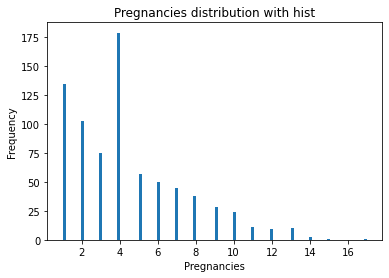

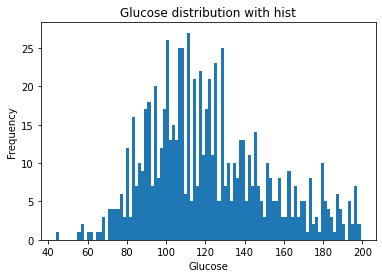

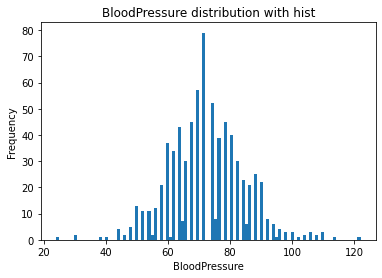

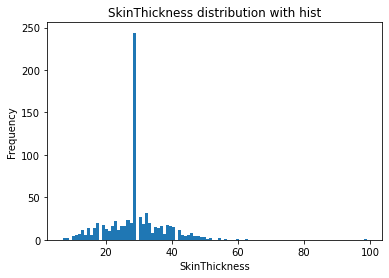

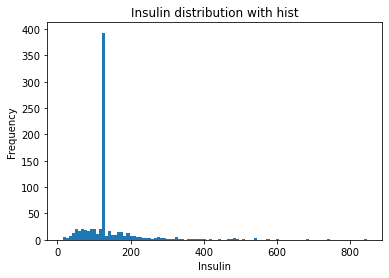

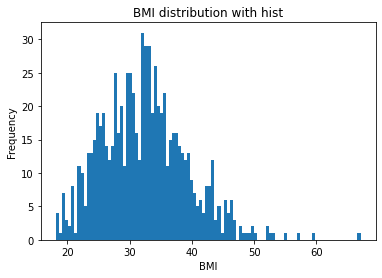

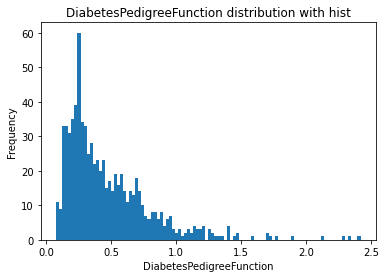

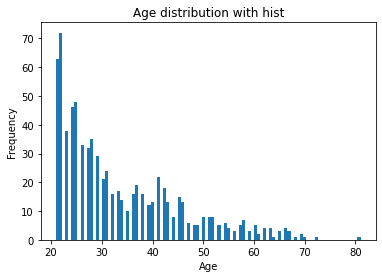

In [12]:
for itr in numericVar:
    plt.hist(dataframe[itr], bins = 100)
    plt.xlabel(itr)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(itr))
    plt.show()

In [13]:
x=dataframe.drop('Outcome',axis=1)
y=dataframe['Outcome']


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 21)

In [15]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

# knn algorithm


## sk learn

In [16]:
k=int(math.sqrt(len(y_test)))
if (k%2==0):
    k+=1
print(k)

13


In [17]:
model=KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [18]:
ypred=model.predict(x_test)

In [19]:
accuracy_score(y_test,ypred)

0.7552083333333334

In [20]:
confusion_matrix(y_test,ypred)

array([[106,  15],
       [ 32,  39]], dtype=int64)

In [21]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       121
           1       0.72      0.55      0.62        71

    accuracy                           0.76       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



## self implementation


In [142]:
def euc_dis(x,y):
    return (math.pow(abs(x-y),2))

In [152]:
def knn_algo(x_train,y_train,curr,k):
    k_dis=[]
    count_pos=0
    count_neg=0
    #size=curr.shape[0]
    #print(y_train)
    for (i,j) in zip(x_train,y_train):
        dis=0
        for it in range(len(i)):
            dis+=euc_dis(i[it],curr[it])
        
        dis=math.sqrt(dis)
        k_dis.append((dis,j))
    k_dis=sorted(k_dis)
    for i in range(k):
        if(k_dis[i][1]==0):
            count_neg+=1
        else:
            count_pos+=1
    if(count_pos>count_neg):
        return 1
    else:
        return 0

In [197]:
y_pred_self=[]
for i in range(len(x_test)):
    diabetes_pred=knn_algo(x_train,y_train,x_test[i],21)
    y_pred_self.append(diabetes_pred)

In [198]:
print(y_pred_self)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


In [199]:
accuracy_score(y_test,y_pred_self)

0.7864583333333334

In [200]:
confusion_matrix(y_test,y_pred_self)

array([[111,  10],
       [ 31,  40]], dtype=int64)

In [201]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       121
           1       0.72      0.55      0.62        71

    accuracy                           0.76       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192

